In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from src.funcs import load_data

In [16]:
DATADIR = '/Volumes/b/Galvanize/DS-RFT4/capstones-RFT4/datasets/covid_pneumonia/small_data_set'
FOLDER = '/train/'
CATEGORIES = {'COVID-19/' : 0, 'normal/' : 1, 'pneumonia/' : 2}

In [17]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/b/Galvanize/DS-RFT4/capstones-RFT4/datasets/covid_pneumonia/small_data_set/COVID-19/'

In [125]:
print(img_array)

[[  3   6   8 ...   3   3   3]
 [  3   6   8 ...   3   3   3]
 [  3   6   8 ...   3   3   3]
 ...
 [ 35  91  91 ...   3   2   2]
 [ 41 100  97 ...   2   1   2]
 [ 44 109 106 ...   1   1   2]]


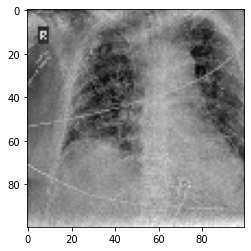

In [109]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [110]:
IMG_SIZE = 50

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass



In [111]:
create_training_data()

In [112]:
print(len(training_data))

13897


In [113]:
import random

random.shuffle(training_data)

1
2
1


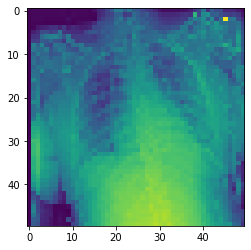

In [114]:
for sample in training_data[:3]:
    print(sample[1])
    plt.imshow(sample[0])
    plt.show

In [115]:
X = []
y = []

In [116]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [117]:
y = np.array(y)

In [118]:
y

array([1, 2, 1, ..., 1, 1, 1])

In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D


In [120]:
X = X/255.0


In [121]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [127]:
# model.fit(X, y, batch_size=10, epochs=5, validation_split=0.1)

In [128]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [131]:
# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)

# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         '/Volumes/b/Galvanize/DS-RFT4/capstones-RFT4/datasets/covid_pneumonia/small_data_set/train',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='categorical')
# validation_generator = test_datagen.flow_from_directory(
#         '/Volumes/b/Galvanize/DS-RFT4/capstones-RFT4/datasets/covid_pneumonia/small_data_set/test',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='categorical')
# model.fit(
#         train_generator,
#         steps_per_epoch=2000,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=800)

In [136]:
data_dir = '/Volumes/b/Galvanize/DS-RFT4/capstones-RFT4/datasets/covid_pneumonia/small_data_set/train'
save_dir = '/Volumes/b/Galvanize/DS-RFT4/capstones-RFT4/datasets/covid_pneumonia/712865_1242442_bundle_archive/train/test_image_process'
class_list = ['COVID-19', 'normal', 'pneumonia']

ImageDataGenerator.flow_from_directory(
    directory = data_dir, 
    target_size=(256, 256), color_mode='grayscale', classes=class_list,
    class_mode='binary', batch_size=32, shuffle=True, seed=42,
    save_to_dir=save_dir, save_prefix='', save_format='png', follow_links=False,
    subset=None, interpolation='nearest'
)

TypeError: flow_from_directory() missing 1 required positional argument: 'self'

In [10]:
X_train, y_train = load_data(DATADIR, FOLDER, categories, img_size=50)

In [12]:
X_train

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.41176471],
         [0.48627451],
         [0.55686275],
         ...,
         [0.57647059],
         [0.43137255],
         [0.56470588]],

        [[0.36470588],
         [0.45098039],
         [0.50980392],
         ...,
         [0.54509804],
         [0.40784314],
         [0.50588235]],

        [[0.4745098 ],
         [0.55294118],
         [0.60392157],
         ...,
         [0.68235294],
         [0.54901961],
         [0.59215686]]],


       [[[0.0745098 ],
         [0.07058824],
         [0.07

In [48]:
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

pickle_in = open('y.pickle', 'rb')
y = pickle.load(pickle_in)

In [43]:
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()